In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import copy
import geopandas as gpd
import pyproj
from shapely.geometry import Polygon
import seaborn as sns
import scipy.stats as st
from scipy.stats import gamma, chisquare
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Residuos

In [4]:
residuos = pd.read_csv(r'/content/drive/MyDrive/proyecto_mapa/ResiduosDomiciliares.csv')

In [5]:
residuos

,Fecha,ASE 1 Promoambiental,ASE 2 LIME S.A E.S.P,ASE 3 CIUDAD LIMPIA,ASE 4 BOGOTÁ LIMPIA,ASE 5 ÁREA LIMPIA
0,ene-21,30458.00,46826.65,27568.95,18625.85,21445.92
1,feb-21,30118.74,44995.05,26634.92,18514.30,20984.95
2,mar-21,34466.28,51004.48,29900.93,20938.40,23932.27
3,abr-21,30309.92,45796.20,27354.72,18792.51,21215.22
4,may-21,31518.84,46783.48,27935.87,19092.21,22096.20
5,jun-21,31944.29,48263.20,28535.79,19628.92,22732.76
6,oct-21,32542.26,48611.47,28258.53,18895.60,21990.18
7,nov-21,33844.97,51082.26,29042.89,19575.36,22607.18
8,dic-21,34895.17,52617.28,29768.08,20342.79,23518.54
9,ene-22,30610.09,45466.94,25625.64,17583.43,20552.61


### Cálculo residuos orgánicos

In [6]:
residuos['ASE 1 Promoambiental'] = residuos['ASE 1 Promoambiental'].apply(lambda x: x*0.6)
residuos['ASE 2 LIME S.A E.S.P'] = residuos['ASE 2 LIME S.A E.S.P'].apply(lambda x: x*0.6)
residuos['ASE 3 CIUDAD LIMPIA'] = residuos['ASE 3 CIUDAD LIMPIA'].apply(lambda x: x*0.6)
residuos['ASE 4 BOGOTÁ LIMPIA'] = residuos['ASE 4 BOGOTÁ LIMPIA'].apply(lambda x: x*0.6)
residuos['ASE 5 ÁREA LIMPIA'] = residuos['ASE 5 ÁREA LIMPIA'].apply(lambda x: x*0.6)

In [7]:
residuos

,Fecha,ASE 1 Promoambiental,ASE 2 LIME S.A E.S.P,ASE 3 CIUDAD LIMPIA,ASE 4 BOGOTÁ LIMPIA,ASE 5 ÁREA LIMPIA
0,ene-21,18274.800,28095.990,16541.370,11175.510,12867.552
1,feb-21,18071.244,26997.030,15980.952,11108.580,12590.970
2,mar-21,20679.768,30602.688,17940.558,12563.040,14359.362
3,abr-21,18185.952,27477.720,16412.832,11275.506,12729.132
4,may-21,18911.304,28070.088,16761.522,11455.326,13257.720
5,jun-21,19166.574,28957.920,17121.474,11777.352,13639.656
6,oct-21,19525.356,29166.882,16955.118,11337.360,13194.108
7,nov-21,20306.982,30649.356,17425.734,11745.216,13564.308
8,dic-21,20937.102,31570.368,17860.848,12205.674,14111.124
9,ene-22,18366.054,27280.164,15375.384,10550.058,12331.566


In [8]:
concesionarias = ['ASE 1 Promoambiental', 'ASE 2 LIME S.A E.S.P', 'ASE 3 CIUDAD LIMPIA', 'ASE 4 BOGOTÁ LIMPIA', 'ASE 5 ÁREA LIMPIA']

In [9]:
residuos.describe()

,ASE 1 Promoambiental,ASE 2 LIME S.A E.S.P,ASE 3 CIUDAD LIMPIA,ASE 4 BOGOTÁ LIMPIA,ASE 5 ÁREA LIMPIA
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,19317.593217,28485.180261,16418.379391,11444.829130,13000.116261
std,922.834230,1507.078771,852.288615,548.063124,635.938338
min,17825.934000,25141.848000,14574.072000,10337.190000,11765.826000
25%,18482.682000,27474.753000,15838.938000,11142.045000,12577.998000
50%,19168.422000,28198.728000,16541.370000,11455.326000,12867.552000
75%,19990.179000,29291.715000,16894.779000,11775.921000,13428.627000
max,20937.102000,31570.368000,17940.558000,12563.040000,14359.362000


In [10]:
promedioResiduos = [19317.593217, 28485.180261, 16418.379391, 11444.829130, 13000.116261]

### Población

In [11]:
poblacion = pd.read_csv(r'/content/drive/MyDrive/proyecto_mapa/bogota_poblacion.csv')

In [12]:
poblacion = poblacion.dropna(how='all')

In [13]:
poblacion['Localidad'] = poblacion['Localidad'].str.lower()
poblacion['Localidad'] = poblacion['Localidad'].replace(['antonio nariyo'],'antonio narino')

In [14]:
poblacion

,N.º,Localidad,Códigos Postales,Superficie,Poblacion,Densidad,Latitud,Longitud
0,1.0,usaquen,110111-110151,65.54,501999.0,"7,686.40",-74.031,4.749
1,2.0,chapinero,110211-110231,35.78,139701.0,"3,661.88",-74.047,4.657
2,3.0,santafe,110311-110321,44.82,110048.0,"2,436.30",-74.030,4.596
3,4.0,san cristobal,110411-110441,48.83,387736.0,8243.98,-74.088,4.546
4,5.0,usme,110511-110571,122.63,457302.0,2126.39,-74.103,4.477
5,6.0,tunjuelito,110611-110621,10.79,199430.0,20124.11,-74.141,4.588
6,7.0,bosa,110711-110741,24.22,673077.0,28126.91,-74.195,4.631
7,8.0,kennedy,110811-110881,38.72,1230539.0,28205.31,-74.157,4.627
8,9.0,fontibon,110911-110931,33.32,394648.0,11858.41,-74.148,4.683
9,10.0,engativa,111011-111071,36.06,887080.0,24723.52,-74.107,4.707


### Esquema de Aseo

In [15]:
esquemaAseo = {'ASE 1 Promoambiental': ['usaquen', 'chapinero', 'santafe', 'san cristobal', 'usme', 'candelaria', 'sumapaz'],
               'ASE 2 LIME S.A E.S.P': ['tunjuelito', 'bosa', 'teusaquillo', 'martires', 'antonio narino', 'puente aranda', 'rafael uribe', 'ciudad bolivar'],
               'ASE 3 CIUDAD LIMPIA': ['kennedy', 'fontibon'],
               'ASE 4 BOGOTÁ LIMPIA': ['engativa', 'barrios unidos'],
               'ASE 5 ÁREA LIMPIA': ['suba']}

### Población por concesionaria

In [16]:
poblacionPorConcesionaria = []
conteo = 0
for i in range(len(esquemaAseo)):
    conteo = 0
    for j in range(len(esquemaAseo[concesionarias[i]])):
        conteo += poblacion.loc[poblacion['Localidad'] == esquemaAseo[concesionarias[i]][j], 'Poblacion'].iloc[0]
    poblacionPorConcesionaria.append(conteo)

poblacionPorConcesionaria = dict(zip(concesionarias, poblacionPorConcesionaria))

In [17]:
poblacionPorConcesionaria

{'ASE 1 Promoambiental': 1627405.0,
 'ASE 2 LIME S.A E.S.P': 2600219.0,
 'ASE 3 CIUDAD LIMPIA': 1625187.0,
 'ASE 4 BOGOTÁ LIMPIA': 1130545.0,
 'ASE 5 ÁREA LIMPIA': 1348372.0}

### Proporción de población en localidad por concesionaria

In [18]:
proporcion = copy.deepcopy(esquemaAseo)

In [19]:
p = 0
for i in range(len(esquemaAseo)):
    p = 0
    for j in range(len(esquemaAseo[concesionarias[i]])):
        p = (poblacion.loc[poblacion['Localidad'] == esquemaAseo[concesionarias[i]][j], 'Poblacion'].iloc[0]) / poblacionPorConcesionaria[concesionarias[i]]
        proporcion[concesionarias[i]][j] = p

In [20]:
proporcion

{'ASE 1 Promoambiental': [0.308465931959162,
  0.08584279881160498,
  0.06762176594025458,
  0.2382541530842046,
  0.28100073429785455,
  0.014801478427312194,
  0.004013137479607105],
 'ASE 2 LIME S.A E.S.P': [0.07669738587403599,
  0.25885396576211467,
  0.05885081218158932,
  0.038119481474445036,
  0.041987232613868296,
  0.0993327869690976,
  0.14392864601020144,
  0.28222968911464763],
 'ASE 3 CIUDAD LIMPIA': [0.7571676367088833, 0.24283236329111665],
 'ASE 4 BOGOTÁ LIMPIA': [0.7846481121936765, 0.2153518878063235],
 'ASE 5 ÁREA LIMPIA': [1.0]}

### Residuos en localidad por concesionaria

In [21]:
residuosPorLocalidad = copy.deepcopy(esquemaAseo)

In [22]:
r = 0
for i in range(len(esquemaAseo)):
    r = 0
    for j in range(len(esquemaAseo[concesionarias[i]])):
        r = promedioResiduos[i] * proporcion[concesionarias[i]][j]
        residuosPorLocalidad[concesionarias[i]][j] = r

In [23]:
residuosPorLocalidad

{'ASE 1 Promoambiental': [5958.819394889892,
  1658.276268051356,
  1306.2897670490236,
  4602.496811541511,
  5428.257878844254,
  285.9289392690179,
  77.5241573549467],
 'ASE 2 LIME S.A E.S.P': [2184.7388621693904,
  7373.501876008559,
  1676.3759934988266,
  1085.840301255417,
  1196.0138896665767,
  2829.512342642257,
  4099.833426322247,
  8039.363569436728],
 'ASE 3 CIUDAD LIMPIA': [12431.465522073304, 3986.9138689266942],
 'ASE 4 BOGOTÁ LIMPIA': [8980.163571233697, 2464.665558766303],
 'ASE 5 ÁREA LIMPIA': [13000.116261]}

### Residuos por localidad

In [24]:
localidades, cantResiduos = [], []
for i in range(len(esquemaAseo)):
    for j in range(len(esquemaAseo[concesionarias[i]])):
        localidades.append(esquemaAseo[concesionarias[i]][j])
        cantResiduos.append(residuosPorLocalidad[concesionarias[i]][j])

residuosPorLocalidad = dict(zip(localidades, cantResiduos))

In [25]:
residuosPorLocalidad = pd.DataFrame({'Localidad': list(residuosPorLocalidad.keys()), 'Residuos': list(residuosPorLocalidad.values())})

In [26]:
residuosPorLocalidad

,Localidad,Residuos
0,usaquen,5958.819395
1,chapinero,1658.276268
2,santafe,1306.289767
3,san cristobal,4602.496812
4,usme,5428.257879
5,candelaria,285.928939
6,sumapaz,77.524157
7,tunjuelito,2184.738862
8,bosa,7373.501876
9,teusaquillo,1676.375993


### Población por localidad

In [27]:
poblacionPorLocalidad = poblacion.drop(['N.º', 'Códigos Postales', 'Superficie', 'Densidad', 'Latitud', 'Longitud'], axis=1)
poblacionPorLocalidad.rename(columns = {'Poblacion':'Población'}, inplace = True)

In [28]:
poblacionPorLocalidad

,Localidad,Población
0,usaquen,501999.0
1,chapinero,139701.0
2,santafe,110048.0
3,san cristobal,387736.0
4,usme,457302.0
5,tunjuelito,199430.0
6,bosa,673077.0
7,kennedy,1230539.0
8,fontibon,394648.0
9,engativa,887080.0


In [29]:
residuosPorLocalidad = pd.merge(poblacionPorLocalidad, residuosPorLocalidad, on='Localidad', how='outer')

### Parques

In [30]:
shapefile_path = r'/content/drive/MyDrive/proyecto_mapa/shape/parques.shp'
gdf = gpd.read_file(shapefile_path)

src_crs = pyproj.CRS.from_epsg(4686)
target_crs = pyproj.CRS.from_epsg(4326)

transformer = pyproj.Transformer.from_crs(src_crs, target_crs, always_xy=True)

geojsonParks = gdf.to_crs(target_crs)

In [31]:
geojsonParks['LOCNOMBRE'] = geojsonParks['LOCNOMBRE'].str.lower()
geojsonParks['LOCNOMBRE'] = geojsonParks['LOCNOMBRE'].replace(['antonio nari¥o'],'antonio narino')
geojsonParks['LOCNOMBRE'] = geojsonParks['LOCNOMBRE'].replace(['antonio nariño'],'antonio narino')

In [32]:
geojsonParks

,OBJECTID,ID_PARQUE,ESTRATO,ID_UPZ,NOMBRE_PAR,CODIGOPOT,TIPOPARQUE,LOCNOMBRE,ADMINISTRA,ESTADO_CER,ID_LOCALID,FECHAINCOR,SHAPE_AREA,SHAPE_LEN,geometry
0,50,09-371,4,UPZ112,VILLA ALSACIA LOTE 1,NaN,PARQUE VECINAL,fontibon,NaN,INVESTIGADO NO CERTIFICADO,9.0,2004-01-01,9054.452153,1483.630750,"MULTIPOLYGON (((-74.12535 4.64545, -74.12544 4..."
1,51,11-552,2,UPZ71,URBANIZACION PUERTA DEL SOL,NaN,PARQUE VECINAL,suba,NaN,CERTIFICADO,11.0,2006-05-20,1092.129365,173.547851,"POLYGON ((-74.10656 4.74528, -74.10656 4.74528..."
2,52,11-566,3,UPZ27,LA FONTANA,NaN,PARQUE VECINAL,suba,NaN,CERTIFICADO,11.0,2004-01-01,3116.914950,319.903534,"POLYGON ((-74.10309 4.75162, -74.10315 4.75148..."
3,53,16-206,3,UPZ40,VERAGUAS CENTRAL (BARRIO COMUNEROS Y BOCHICA),NaN,PARQUE VECINAL,puente aranda,NaN,CERTIFICADO,16.0,2004-01-01,6551.828359,346.864294,"POLYGON ((-74.10237 4.60517, -74.10236 4.60520..."
4,54,16-190,3,UPZ41,URBANIZACION MUZU I ETAPA (OSPINA PREZ),NaN,PARQUE DE BOLSILLO,puente aranda,NaN,CERTIFICADO,16.0,2004-01-01,277.904632,101.515558,"POLYGON ((-74.13232 4.59597, -74.13215 4.59619..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,5277,07-457,2,UPZ87,Urbanizacion Ciudadela El Recreo,NaN,PARQUE VECINAL,bosa,NaN,CERTIFICADO,7.0,2019-08-15,5435.041248,334.651573,"POLYGON ((-74.19980 4.62705, -74.19981 4.62705..."
5311,5278,05-499,2,UPZ56,CIUDAD NUEVO MILENIO,NaN,PARQUE VECINAL,usme,NaN,CERTIFICADO,5.0,2019-08-15,23613.722538,1103.516899,"POLYGON ((-74.11645 4.52926, -74.11647 4.52855..."
5312,5279,01-582,4,UPZ9,Horizontes Norte,NaN,PARQUE VECINAL,usaquen,NaN,CERTIFICADO,1.0,2019-08-27,3380.590343,291.910618,"POLYGON ((-74.02466 4.75865, -74.02464 4.75859..."
5313,5280,01-138,3,UPZ9,El Palmar,NaN,PARQUE DE BOLSILLO,usaquen,NaN,CERTIFICADO,1.0,2015-01-08,1005.348859,127.065894,"POLYGON ((-74.02908 4.76839, -74.02887 4.76839..."


### Puntos paqueros

In [33]:
file_list = [r'/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_CENTRO.geojson',
             r'/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_CENTROI.geojson',
             r'/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_NORTE.geojson',
             r'/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_NORTE_2.geojson',
             r'/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_OCCIDENTAL.geojson',
             r'/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_SUR.geojson',
             r'/content/drive/MyDrive/proyecto_mapa/mygeodata/PACA_NODO_SUR_OCCIDENTE.geojson']

gdf_list = []

for file in file_list:
    gdf_temp = gpd.read_file(file)
    gdf_list.append(gdf_temp)

pacas = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

In [34]:
pacas

,Name,description,gx_media_links,geometry
0,Paca Armenia-nodo centro,"<img src=""https://doc-0c-38-mymaps.googleuserc...",https://doc-0c-38-mymaps.googleusercontent.com...,POINT Z (-74.07344 4.61759 0.00000)
1,Centro Nariño,"<img src=""https://doc-0g-38-mymaps.googleuserc...",https://doc-0g-38-mymaps.googleusercontent.com...,POINT Z (-74.08726 4.62776 0.00000)
2,Parque Pony,Nodo Centro Teusaquillo,NaN,POINT Z (-74.07201 4.61905 0.00000)
3,Santa Isabel,"<img src=""https://doc-0c-38-mymaps.googleuserc...",https://doc-0c-38-mymaps.googleusercontent.com...,POINT Z (-74.09707 4.60090 0.00000)
4,Paca San Luis.,NaN,NaN,POINT Z (-74.06932 4.64842 0.00000)
...,...,...,...,...
146,Paca Puente Aranda Renace San Rafael,"<img src=""https://doc-0s-38-mymaps.googleuserc...",https://doc-0s-38-mymaps.googleusercontent.com...,POINT Z (-74.11435 4.62020 0.00000)
147,Paca huerta copetones,"<img src=""https://doc-14-38-mymaps.googleuserc...",https://doc-14-38-mymaps.googleusercontent.com...,POINT Z (-74.11188 4.60126 0.00000)
148,Paca huerta san eusebio,"<img src=""https://doc-0k-38-mymaps.googleuserc...",https://doc-0k-38-mymaps.googleusercontent.com...,POINT Z (-74.12291 4.60454 0.00000)
149,pacas huerta pradera,"<img src=""https://doc-00-38-mymaps.googleuserc...",https://doc-00-38-mymaps.googleusercontent.com...,POINT Z (-74.12218 4.62305 0.00000)


### Asociar punto paquero a parque

In [35]:
polygons = geojsonParks
points = pacas

# Create an empty DataFrame to store the results
nombre_paca, resultspoints, nombre_parque, resultspolygons, localidad = [], [], [], [], []

# Iterate over each point
for point_idx, point in points.iterrows():
    nearest_polygon_id = None
    min_distance = float('inf')

    # Iterate over each polygon
    for polygon_idx, polygon in polygons.iterrows():
        # Calculate the distance between the point and the polygon
        distance = point.geometry.distance(polygon.geometry)

        # Check if this distance is the smallest so far
        if distance < min_distance:
            min_distance = distance
            nearest_polygon_id = polygon_idx

    # Store the results in the DataFrame
    resultspoints.append(point_idx)
    nombre_paca.append(point['Name'])
    resultspolygons.append(nearest_polygon_id)
    nombre_parque.append(geojsonParks['NOMBRE_PAR'][resultspolygons[-1]])
    localidad.append(geojsonParks['LOCNOMBRE'][resultspolygons[-1]])

df = pd.DataFrame(list(zip(nombre_paca, resultspoints, nombre_parque, resultspolygons, localidad)), columns =['Nombre Paca', 'Points', 'Nombre_Parque', 'Parks', 'Localidad'])

In [36]:
df

,Nombre Paca,Points,Nombre_Parque,Parks,Localidad
0,Paca Armenia-nodo centro,0,URBANIZACION ARMENIA,4544,teusaquillo
1,Centro Nariño,1,URBANIZACION PARQUE TACAY,1200,teusaquillo
2,Parque Pony,2,BARRIO ARMENIA,2080,teusaquillo
3,Santa Isabel,3,URBANIZACION VERAGUAS II,246,martires
4,Paca San Luis.,4,URBANIZACION SAN LUIS,2409,teusaquillo
...,...,...,...,...,...
146,Paca Puente Aranda Renace San Rafael,146,LOS EUCALIPTOS,708,puente aranda
147,Paca huerta copetones,147,SANTA MATILDE II SECTOR,3259,puente aranda
148,Paca huerta san eusebio,148,SAN EUSEBIO,2533,puente aranda
149,pacas huerta pradera,149,URBANIZACION LA PRADERA SUR (ANTES SALAZAR-GOMEZ),2534,puente aranda


### Puntos paqueros por localidad

In [37]:
puntosPaqueros = df['Localidad'].value_counts().rename_axis('Localidad').reset_index(name='Puntos Paqueros')

In [38]:
puntosPaqueros

,Localidad,Puntos Paqueros
0,barrios unidos,38
1,teusaquillo,30
2,suba,16
3,chapinero,9
4,engativa,9
5,kennedy,8
6,usaquen,8
7,puente aranda,7
8,rafael uribe,5
9,santafe,4


### Capacidad de procesamiento de basura por localidad

In [39]:
huertaMyso = [226.78, 251.59, 260, 392, 472, 518, 313, 488, 380, 653.2, 400, 280, 385.5] #libras colombianas
pacaMama22 = [374, 382, 290, 298, 300, 337, 292, 455, 576, 422, 409] #libras colombianas
pacaMama23 = [283.5, 314.9, 264, 348] #kilos

In [40]:
def libColTon(lista):
    lista1 = []
    for i in range(len(lista)):
        n = lista[i]
        n = (n/2)/1000
        lista1.append(n)
    return lista1

In [41]:
def kilTon(lista):
    lista1 = []
    for i in range(len(lista)):
        n = lista[i]
        n = n/1000
        lista1.append(n)
    return lista1

In [42]:
huertaMyso1 = libColTon(huertaMyso)

In [43]:
pacaMama22_1 = libColTon(pacaMama22)

In [44]:
pacaMama23_1 = kilTon(pacaMama23)

In [45]:
pesos = huertaMyso1 + pacaMama22_1 + pacaMama23_1

In [46]:
pesos

[0.11339,
 0.125795,
 0.13,
 0.196,
 0.236,
 0.259,
 0.1565,
 0.244,
 0.19,
 0.3266,
 0.2,
 0.14,
 0.19275,
 0.187,
 0.191,
 0.145,
 0.149,
 0.15,
 0.1685,
 0.146,
 0.2275,
 0.288,
 0.211,
 0.2045,
 0.2835,
 0.31489999999999996,
 0.264,
 0.348]

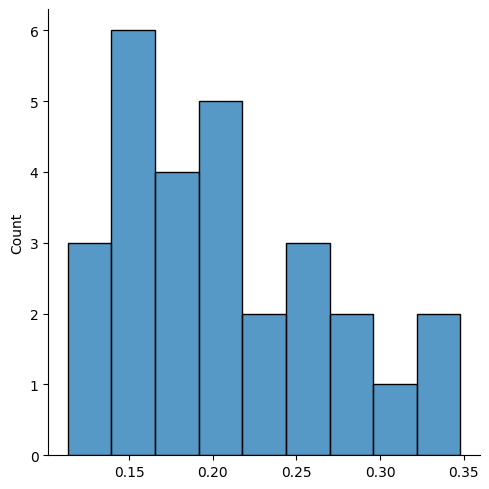

In [47]:
sns.displot(pesos, bins = 9)

### Prueba chi cuadrada distribución gamma

In [48]:
shape, loc, scale = gamma.fit(pesos)

In [49]:
# Clases
clases = [[0.11339, 0.14690571428571428], [0.14690571428571428, 0.18042142857142857],
          [0.18042142857142857, 0.21393714285714285], [0.21393714285714285, 0.24745285714285714],
          [0.24745285714285714, 0.2809685714285714], [0.2809685714285714, 0.31448428571428566],
          [0.31448428571428566, 0.348]]

# Frecuencias observadas
fo = [6, 4, 8, 3, 2, 2, 3]

# Frecuencias esperadas de acuerdo al ajuste de parámetros de una distribución gamma
fe = [4, 7, 5, 6, 2, 3, 1]

# Prueba
chi2_statistic, p_value = chisquare(fo, f_exp=fe)

print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)

Chi-square statistic: 9.919047619047618
p-value: 0.12810275679424804


### Intervalo de confianza

In [50]:
intConf = st.gamma.interval(confidence = 0.95, a = shape, loc = loc, scale = scale)

In [51]:
intConf

(0.11874573428244041, 0.37835948470961134)

In [52]:
capacidadProcesamiento = []
for i in range(len(puntosPaqueros)):
    c = puntosPaqueros['Puntos Paqueros'][i] * intConf[0]
    p = puntosPaqueros['Puntos Paqueros'][i] * intConf[1]
    capacidadProcesamiento.append([c, p])

In [53]:
puntosPaqueros['Capacidad Procesamiento'] = capacidadProcesamiento

In [54]:
puntosPaqueros

,Localidad,Puntos Paqueros,Capacidad Procesamiento
0,barrios unidos,38,"[4.512337902732735, 14.377660418965231]"
1,teusaquillo,30,"[3.562372028473212, 11.35078454128834]"
2,suba,16,"[1.8999317485190466, 6.053751755353781]"
3,chapinero,9,"[1.0687116085419637, 3.405235362386502]"
4,engativa,9,"[1.0687116085419637, 3.405235362386502]"
5,kennedy,8,"[0.9499658742595233, 3.0268758776768907]"
6,usaquen,8,"[0.9499658742595233, 3.0268758776768907]"
7,puente aranda,7,"[0.8312201399770829, 2.6485163929672795]"
8,rafael uribe,5,"[0.5937286714122021, 1.8917974235480566]"
9,santafe,4,"[0.47498293712976164, 1.5134379388384454]"


### Residuos por localidad

In [55]:
residuosPorLocalidad

,Localidad,Población,Residuos
0,usaquen,501999.0,5958.819395
1,chapinero,139701.0,1658.276268
2,santafe,110048.0,1306.289767
3,san cristobal,387736.0,4602.496812
4,usme,457302.0,5428.257879
5,tunjuelito,199430.0,2184.738862
6,bosa,673077.0,7373.501876
7,kennedy,1230539.0,12431.465522
8,fontibon,394648.0,3986.913869
9,engativa,887080.0,8980.163571


In [56]:
puntosPaqueros

,Localidad,Puntos Paqueros,Capacidad Procesamiento
0,barrios unidos,38,"[4.512337902732735, 14.377660418965231]"
1,teusaquillo,30,"[3.562372028473212, 11.35078454128834]"
2,suba,16,"[1.8999317485190466, 6.053751755353781]"
3,chapinero,9,"[1.0687116085419637, 3.405235362386502]"
4,engativa,9,"[1.0687116085419637, 3.405235362386502]"
5,kennedy,8,"[0.9499658742595233, 3.0268758776768907]"
6,usaquen,8,"[0.9499658742595233, 3.0268758776768907]"
7,puente aranda,7,"[0.8312201399770829, 2.6485163929672795]"
8,rafael uribe,5,"[0.5937286714122021, 1.8917974235480566]"
9,santafe,4,"[0.47498293712976164, 1.5134379388384454]"


In [57]:
resultado = pd.merge(puntosPaqueros, residuosPorLocalidad, on='Localidad', how='outer')
resultado['Puntos Paqueros'] = resultado['Puntos Paqueros'].fillna(0)
resultado['Capacidad Procesamiento'] = resultado['Capacidad Procesamiento'].fillna(0)
resultado = resultado[['Localidad', 'Población', 'Residuos', 'Puntos Paqueros', 'Capacidad Procesamiento']]

In [58]:
resultado

,Localidad,Población,Residuos,Puntos Paqueros,Capacidad Procesamiento
0,barrios unidos,243465.0,2464.665559,38.0,"[4.512337902732735, 14.377660418965231]"
1,teusaquillo,153025.0,1676.375993,30.0,"[3.562372028473212, 11.35078454128834]"
2,suba,1348372.0,13000.116261,16.0,"[1.8999317485190466, 6.053751755353781]"
3,chapinero,139701.0,1658.276268,9.0,"[1.0687116085419637, 3.405235362386502]"
4,engativa,887080.0,8980.163571,9.0,"[1.0687116085419637, 3.405235362386502]"
5,kennedy,1230539.0,12431.465522,8.0,"[0.9499658742595233, 3.0268758776768907]"
6,usaquen,501999.0,5958.819395,8.0,"[0.9499658742595233, 3.0268758776768907]"
7,puente aranda,258287.0,2829.512343,7.0,"[0.8312201399770829, 2.6485163929672795]"
8,rafael uribe,374246.0,4099.833426,5.0,"[0.5937286714122021, 1.8917974235480566]"
9,santafe,110048.0,1306.289767,4.0,"[0.47498293712976164, 1.5134379388384454]"


### ¿Cuánto más se necesita procesar?

In [59]:
faltaProcesamiento, faltaProcesamientoPorcentaje = [], []
for i in range(len(resultado)-1):
    c = resultado['Residuos'][i] - resultado['Capacidad Procesamiento'][i][0]
    p = resultado['Residuos'][i] - resultado['Capacidad Procesamiento'][i][1]
    faltaProcesamiento.append([p, c])

    cc = round((c*100)/resultado['Residuos'][i], 3)
    pp = round((p*100)/resultado['Residuos'][i], 3)
    faltaProcesamientoPorcentaje.append([pp, cc])
faltaProcesamiento.append(5428.257879)
faltaProcesamientoPorcentaje.append(100)

In [60]:
resultado['Falta Procesamiento'] = faltaProcesamiento
resultado['Falta Procesamiento %'] = faltaProcesamientoPorcentaje

In [61]:
resultado

,Localidad,Población,Residuos,Puntos Paqueros,Capacidad Procesamiento,Falta Procesamiento,Falta Procesamiento %
0,barrios unidos,243465.0,2464.665559,38.0,"[4.512337902732735, 14.377660418965231]","[2450.287898347338, 2460.1532208635704]","[99.417, 99.817]"
1,teusaquillo,153025.0,1676.375993,30.0,"[3.562372028473212, 11.35078454128834]","[1665.0252089575383, 1672.8136214703534]","[99.323, 99.787]"
2,suba,1348372.0,13000.116261,16.0,"[1.8999317485190466, 6.053751755353781]","[12994.062509244646, 12998.21632925148]","[99.953, 99.985]"
3,chapinero,139701.0,1658.276268,9.0,"[1.0687116085419637, 3.405235362386502]","[1654.8710326889695, 1657.2075564428142]","[99.795, 99.936]"
4,engativa,887080.0,8980.163571,9.0,"[1.0687116085419637, 3.405235362386502]","[8976.758335871311, 8979.094859625155]","[99.962, 99.988]"
5,kennedy,1230539.0,12431.465522,8.0,"[0.9499658742595233, 3.0268758776768907]","[12428.438646195627, 12430.515556199045]","[99.976, 99.992]"
6,usaquen,501999.0,5958.819395,8.0,"[0.9499658742595233, 3.0268758776768907]","[5955.792519012215, 5957.869429015632]","[99.949, 99.984]"
7,puente aranda,258287.0,2829.512343,7.0,"[0.8312201399770829, 2.6485163929672795]","[2826.8638262492896, 2828.68112250228]","[99.906, 99.971]"
8,rafael uribe,374246.0,4099.833426,5.0,"[0.5937286714122021, 1.8917974235480566]","[4097.941628898699, 4099.239697650834]","[99.954, 99.986]"
9,santafe,110048.0,1306.289767,4.0,"[0.47498293712976164, 1.5134379388384454]","[1304.776329110185, 1305.814784111894]","[99.884, 99.964]"


### Parques disponibles

In [62]:
df['Parks'].value_counts()

1522    11
1476     9
1356     3
2619     3
1993     3
        ..
2079     1
1957     1
1559     1
1341     1
1184     1
Name: Parks, Length: 115, dtype: int64

In [63]:
df1 = df['Parks'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [64]:
df1

,unique_values,counts
0,1522,11
1,1476,9
2,1356,3
3,2619,3
4,1993,3
...,...,...
110,2079,1
111,1957,1
112,1559,1
113,1341,1


In [65]:
copydf = df.copy(deep=True)

In [66]:
for i in range(len(df1)):
    v = df1['unique_values'][i]
    geojsonParks = geojsonParks.drop(v)
geojsonParks = geojsonParks.reset_index(drop=True)

In [67]:
geojsonParks

,OBJECTID,ID_PARQUE,ESTRATO,ID_UPZ,NOMBRE_PAR,CODIGOPOT,TIPOPARQUE,LOCNOMBRE,ADMINISTRA,ESTADO_CER,ID_LOCALID,FECHAINCOR,SHAPE_AREA,SHAPE_LEN,geometry
0,50,09-371,4,UPZ112,VILLA ALSACIA LOTE 1,NaN,PARQUE VECINAL,fontibon,NaN,INVESTIGADO NO CERTIFICADO,9.0,2004-01-01,9054.452153,1483.630750,"MULTIPOLYGON (((-74.12535 4.64545, -74.12544 4..."
1,51,11-552,2,UPZ71,URBANIZACION PUERTA DEL SOL,NaN,PARQUE VECINAL,suba,NaN,CERTIFICADO,11.0,2006-05-20,1092.129365,173.547851,"POLYGON ((-74.10656 4.74528, -74.10656 4.74528..."
2,53,16-206,3,UPZ40,VERAGUAS CENTRAL (BARRIO COMUNEROS Y BOCHICA),NaN,PARQUE VECINAL,puente aranda,NaN,CERTIFICADO,16.0,2004-01-01,6551.828359,346.864294,"POLYGON ((-74.10237 4.60517, -74.10236 4.60520..."
3,54,16-190,3,UPZ41,URBANIZACION MUZU I ETAPA (OSPINA PREZ),NaN,PARQUE DE BOLSILLO,puente aranda,NaN,CERTIFICADO,16.0,2004-01-01,277.904632,101.515558,"POLYGON ((-74.13232 4.59597, -74.13215 4.59619..."
4,55,01-341,3,UPZ12,URBANIZACION LA RESERVA DEL PALMAR,NaN,PARQUE VECINAL,usaquen,NaN,CERTIFICADO,1.0,2006-05-20,3620.566426,254.610477,"POLYGON ((-74.03852 4.74449, -74.03859 4.74411..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,5277,07-457,2,UPZ87,Urbanizacion Ciudadela El Recreo,NaN,PARQUE VECINAL,bosa,NaN,CERTIFICADO,7.0,2019-08-15,5435.041248,334.651573,"POLYGON ((-74.19980 4.62705, -74.19981 4.62705..."
5196,5278,05-499,2,UPZ56,CIUDAD NUEVO MILENIO,NaN,PARQUE VECINAL,usme,NaN,CERTIFICADO,5.0,2019-08-15,23613.722538,1103.516899,"POLYGON ((-74.11645 4.52926, -74.11647 4.52855..."
5197,5279,01-582,4,UPZ9,Horizontes Norte,NaN,PARQUE VECINAL,usaquen,NaN,CERTIFICADO,1.0,2019-08-27,3380.590343,291.910618,"POLYGON ((-74.02466 4.75865, -74.02464 4.75859..."
5198,5280,01-138,3,UPZ9,El Palmar,NaN,PARQUE DE BOLSILLO,usaquen,NaN,CERTIFICADO,1.0,2015-01-08,1005.348859,127.065894,"POLYGON ((-74.02908 4.76839, -74.02887 4.76839..."


### ¿Cuánto más se puede procesar con los parques disponibles?

In [68]:
df2 = geojsonParks['LOCNOMBRE'].value_counts().rename_axis('Localidad').reset_index(name='counts')

In [69]:
df2

,Localidad,counts
0,suba,983
1,engativa,544
2,kennedy,544
3,usaquen,465
4,ciudad bolivar,443
5,usme,286
6,fontibon,276
7,san cristobal,270
8,puente aranda,264
9,rafael uribe,258


In [70]:
oportunidadProcesamiento = []
for i in range(len(df2)):
    c = df2['counts'][i] * intConf[0]
    p = df2['counts'][i] * intConf[1]
    oportunidadProcesamiento.append([c, p])
df2['Oportunidad Procesamiento'] = oportunidadProcesamiento

In [71]:
df2

,Localidad,counts,Oportunidad Procesamiento
0,suba,983,"[116.72705679963892, 371.92737346954794]"
1,engativa,544,"[64.59767944964759, 205.82755968202858]"
2,kennedy,544,"[64.59767944964759, 205.82755968202858]"
3,usaquen,465,"[55.21676644133479, 175.93716038996928]"
4,ciudad bolivar,443,"[52.604360287121104, 167.61325172635782]"
5,usme,286,"[33.961280004777954, 108.21081262694884]"
6,fontibon,276,"[32.77382266195355, 104.42721777985273]"
7,san cristobal,270,"[32.06134825625891, 102.15706087159506]"
8,puente aranda,264,"[31.348873850564267, 99.88690396333739]"
9,rafael uribe,258,"[30.636399444869625, 97.61674705507973]"


In [72]:
resultado = pd.merge(resultado, df2, on='Localidad', how='outer')
resultado = resultado.drop(['counts'], axis=1)

In [73]:
resultado

,Localidad,Población,Residuos,Puntos Paqueros,Capacidad Procesamiento,Falta Procesamiento,Falta Procesamiento %,Oportunidad Procesamiento
0,barrios unidos,243465.0,2464.665559,38.0,"[4.512337902732735, 14.377660418965231]","[2450.287898347338, 2460.1532208635704]","[99.417, 99.817]","[13.062030771068445, 41.61954331805725]"
1,teusaquillo,153025.0,1676.375993,30.0,"[3.562372028473212, 11.35078454128834]","[1665.0252089575383, 1672.8136214703534]","[99.323, 99.787]","[12.824539302503565, 40.86282434863802]"
2,suba,1348372.0,13000.116261,16.0,"[1.8999317485190466, 6.053751755353781]","[12994.062509244646, 12998.21632925148]","[99.953, 99.985]","[116.72705679963892, 371.92737346954794]"
3,chapinero,139701.0,1658.276268,9.0,"[1.0687116085419637, 3.405235362386502]","[1654.8710326889695, 1657.2075564428142]","[99.795, 99.936]","[17.930605876648503, 57.13228219115131]"
4,engativa,887080.0,8980.163571,9.0,"[1.0687116085419637, 3.405235362386502]","[8976.758335871311, 8979.094859625155]","[99.962, 99.988]","[64.59767944964759, 205.82755968202858]"
5,kennedy,1230539.0,12431.465522,8.0,"[0.9499658742595233, 3.0268758776768907]","[12428.438646195627, 12430.515556199045]","[99.976, 99.992]","[64.59767944964759, 205.82755968202858]"
6,usaquen,501999.0,5958.819395,8.0,"[0.9499658742595233, 3.0268758776768907]","[5955.792519012215, 5957.869429015632]","[99.949, 99.984]","[55.21676644133479, 175.93716038996928]"
7,puente aranda,258287.0,2829.512343,7.0,"[0.8312201399770829, 2.6485163929672795]","[2826.8638262492896, 2828.68112250228]","[99.906, 99.971]","[31.348873850564267, 99.88690396333739]"
8,rafael uribe,374246.0,4099.833426,5.0,"[0.5937286714122021, 1.8917974235480566]","[4097.941628898699, 4099.239697650834]","[99.954, 99.986]","[30.636399444869625, 97.61674705507973]"
9,santafe,110048.0,1306.289767,4.0,"[0.47498293712976164, 1.5134379388384454]","[1304.776329110185, 1305.814784111894]","[99.884, 99.964]","[9.974641679724995, 31.782196715607352]"


### Si se instalan puntos paqueros en todos los parques disponibles, ¿cuánto se procesaría?

In [74]:
cpideal = []
for i in range(len(resultado)-1):
    c = resultado['Capacidad Procesamiento'][i][0] + resultado['Oportunidad Procesamiento'][i][0]
    p = resultado['Capacidad Procesamiento'][i][1] + resultado['Oportunidad Procesamiento'][i][1]
    cpideal.append([c, p])
cpideal.append([51.84374577758636, 66.691284592784])

In [75]:
resultado['Capacidad Procesamiento Escenario Ideal'] = cpideal

In [76]:
resultado

,Localidad,Población,Residuos,Puntos Paqueros,Capacidad Procesamiento,Falta Procesamiento,Falta Procesamiento %,Oportunidad Procesamiento,Capacidad Procesamiento Escenario Ideal
0,barrios unidos,243465.0,2464.665559,38.0,"[4.512337902732735, 14.377660418965231]","[2450.287898347338, 2460.1532208635704]","[99.417, 99.817]","[13.062030771068445, 41.61954331805725]","[17.57436867380118, 55.997203737022474]"
1,teusaquillo,153025.0,1676.375993,30.0,"[3.562372028473212, 11.35078454128834]","[1665.0252089575383, 1672.8136214703534]","[99.323, 99.787]","[12.824539302503565, 40.86282434863802]","[16.386911330976776, 52.21360888992636]"
2,suba,1348372.0,13000.116261,16.0,"[1.8999317485190466, 6.053751755353781]","[12994.062509244646, 12998.21632925148]","[99.953, 99.985]","[116.72705679963892, 371.92737346954794]","[118.62698854815797, 377.98112522490175]"
3,chapinero,139701.0,1658.276268,9.0,"[1.0687116085419637, 3.405235362386502]","[1654.8710326889695, 1657.2075564428142]","[99.795, 99.936]","[17.930605876648503, 57.13228219115131]","[18.999317485190467, 60.53751755353781]"
4,engativa,887080.0,8980.163571,9.0,"[1.0687116085419637, 3.405235362386502]","[8976.758335871311, 8979.094859625155]","[99.962, 99.988]","[64.59767944964759, 205.82755968202858]","[65.66639105818955, 209.23279504441507]"
5,kennedy,1230539.0,12431.465522,8.0,"[0.9499658742595233, 3.0268758776768907]","[12428.438646195627, 12430.515556199045]","[99.976, 99.992]","[64.59767944964759, 205.82755968202858]","[65.5476453239071, 208.85443555970548]"
6,usaquen,501999.0,5958.819395,8.0,"[0.9499658742595233, 3.0268758776768907]","[5955.792519012215, 5957.869429015632]","[99.949, 99.984]","[55.21676644133479, 175.93716038996928]","[56.16673231559432, 178.96403626764618]"
7,puente aranda,258287.0,2829.512343,7.0,"[0.8312201399770829, 2.6485163929672795]","[2826.8638262492896, 2828.68112250228]","[99.906, 99.971]","[31.348873850564267, 99.88690396333739]","[32.18009399054135, 102.53542035630467]"
8,rafael uribe,374246.0,4099.833426,5.0,"[0.5937286714122021, 1.8917974235480566]","[4097.941628898699, 4099.239697650834]","[99.954, 99.986]","[30.636399444869625, 97.61674705507973]","[31.230128116281826, 99.50854447862778]"
9,santafe,110048.0,1306.289767,4.0,"[0.47498293712976164, 1.5134379388384454]","[1304.776329110185, 1305.814784111894]","[99.884, 99.964]","[9.974641679724995, 31.782196715607352]","[10.449624616854756, 33.2956346544458]"


### ¿Cuánto faltaría procesar?

In [77]:
fpideal, faltaProcesamientoEscenarioIdealPorcentaje = [], []
for i in range(len(resultado)):
    c = resultado['Residuos'][i] - resultado['Capacidad Procesamiento Escenario Ideal'][i][0]
    p = resultado['Residuos'][i] - resultado['Capacidad Procesamiento Escenario Ideal'][i][1]
    fpideal.append([p, c])

    cc = round((c*100)/resultado['Residuos'][i], 3)
    pp = round((p*100)/resultado['Residuos'][i], 3)

    faltaProcesamientoEscenarioIdealPorcentaje.append([pp, cc])

In [78]:
resultado['Falta Procesamiento Escenario Ideal'] = fpideal
resultado['Falta Procesamiento Escenario Ideal %'] = faltaProcesamientoEscenarioIdealPorcentaje

In [79]:
resultado

,Localidad,Población,Residuos,Puntos Paqueros,Capacidad Procesamiento,Falta Procesamiento,Falta Procesamiento %,Oportunidad Procesamiento,Capacidad Procesamiento Escenario Ideal,Falta Procesamiento Escenario Ideal,Falta Procesamiento Escenario Ideal %
0,barrios unidos,243465.0,2464.665559,38.0,"[4.512337902732735, 14.377660418965231]","[2450.287898347338, 2460.1532208635704]","[99.417, 99.817]","[13.062030771068445, 41.61954331805725]","[17.57436867380118, 55.997203737022474]","[2408.6683550292805, 2447.091190092502]","[97.728, 99.287]"
1,teusaquillo,153025.0,1676.375993,30.0,"[3.562372028473212, 11.35078454128834]","[1665.0252089575383, 1672.8136214703534]","[99.323, 99.787]","[12.824539302503565, 40.86282434863802]","[16.386911330976776, 52.21360888992636]","[1624.1623846089003, 1659.9890821678498]","[96.885, 99.022]"
2,suba,1348372.0,13000.116261,16.0,"[1.8999317485190466, 6.053751755353781]","[12994.062509244646, 12998.21632925148]","[99.953, 99.985]","[116.72705679963892, 371.92737346954794]","[118.62698854815797, 377.98112522490175]","[12622.135135775097, 12881.489272451841]","[97.092, 99.087]"
3,chapinero,139701.0,1658.276268,9.0,"[1.0687116085419637, 3.405235362386502]","[1654.8710326889695, 1657.2075564428142]","[99.795, 99.936]","[17.930605876648503, 57.13228219115131]","[18.999317485190467, 60.53751755353781]","[1597.7387504978183, 1639.2769505661656]","[96.349, 98.854]"
4,engativa,887080.0,8980.163571,9.0,"[1.0687116085419637, 3.405235362386502]","[8976.758335871311, 8979.094859625155]","[99.962, 99.988]","[64.59767944964759, 205.82755968202858]","[65.66639105818955, 209.23279504441507]","[8770.930776189281, 8914.497180175507]","[97.67, 99.269]"
5,kennedy,1230539.0,12431.465522,8.0,"[0.9499658742595233, 3.0268758776768907]","[12428.438646195627, 12430.515556199045]","[99.976, 99.992]","[64.59767944964759, 205.82755968202858]","[65.5476453239071, 208.85443555970548]","[12222.611086513598, 12365.917876749396]","[98.32, 99.473]"
6,usaquen,501999.0,5958.819395,8.0,"[0.9499658742595233, 3.0268758776768907]","[5955.792519012215, 5957.869429015632]","[99.949, 99.984]","[55.21676644133479, 175.93716038996928]","[56.16673231559432, 178.96403626764618]","[5779.855358622245, 5902.652662574297]","[96.997, 99.057]"
7,puente aranda,258287.0,2829.512343,7.0,"[0.8312201399770829, 2.6485163929672795]","[2826.8638262492896, 2828.68112250228]","[99.906, 99.971]","[31.348873850564267, 99.88690396333739]","[32.18009399054135, 102.53542035630467]","[2726.9769222859522, 2797.3322486517154]","[96.376, 98.863]"
8,rafael uribe,374246.0,4099.833426,5.0,"[0.5937286714122021, 1.8917974235480566]","[4097.941628898699, 4099.239697650834]","[99.954, 99.986]","[30.636399444869625, 97.61674705507973]","[31.230128116281826, 99.50854447862778]","[4000.324881843619, 4068.603298205965]","[97.573, 99.238]"
9,santafe,110048.0,1306.289767,4.0,"[0.47498293712976164, 1.5134379388384454]","[1304.776329110185, 1305.814784111894]","[99.884, 99.964]","[9.974641679724995, 31.782196715607352]","[10.449624616854756, 33.2956346544458]","[1272.9941323945777, 1295.8401424321687]","[97.451, 99.2]"


In [80]:
pacasFaltantes = []
for i in range(len(resultado)):
    promediofpideal = ((fpideal[i][1]-fpideal[i][0])/2) + fpideal[i][0]
    c = promediofpideal / intConf[0]
    p = promediofpideal / intConf[1]
    pacasFaltantes.append([p, c])

In [81]:
resultado['Pacas Faltantes'] = pacasFaltantes

In [82]:
r = resultado.drop(['Población', 'Falta Procesamiento', 'Falta Procesamiento Escenario Ideal'], axis=1)
r

,Localidad,Residuos,Puntos Paqueros,Capacidad Procesamiento,Falta Procesamiento %,Oportunidad Procesamiento,Capacidad Procesamiento Escenario Ideal,Falta Procesamiento Escenario Ideal %,Pacas Faltantes
0,barrios unidos,2464.665559,38.0,"[4.512337902732735, 14.377660418965231]","[99.417, 99.817]","[13.062030771068445, 41.61954331805725]","[17.57436867380118, 55.997203737022474]","[97.728, 99.287]","[6416.859813688229, 20446.03780701801]"
1,teusaquillo,1676.375993,30.0,"[3.562372028473212, 11.35078454128834]","[99.323, 99.787]","[12.824539302503565, 40.86282434863802]","[16.386911330976776, 52.21360888992636]","[96.885, 99.022]","[4339.988290893933, 13828.502921061965]"
2,suba,13000.116261,16.0,"[1.8999317485190466, 6.053751755353781]","[99.953, 99.985]","[116.72705679963892, 371.92737346954794]","[118.62698854815797, 377.98112522490175]","[97.092, 99.087]","[33702.90086397705, 107387.53927600372]"
3,chapinero,1658.276268,9.0,"[1.0687116085419637, 3.405235362386502]","[99.795, 99.936]","[17.930605876648503, 57.13228219115131]","[18.999317485190467, 60.53751755353781]","[96.349, 98.854]","[4277.698633018774, 13630.029409581324]"
4,engativa,8980.163571,9.0,"[1.0687116085419637, 3.405235362386502]","[99.962, 99.988]","[64.59767944964759, 205.82755968202858]","[65.66639105818955, 209.23279504441507]","[97.67, 99.269]","[23371.1967997026, 74467.6348301466]"
5,kennedy,12431.465522,8.0,"[0.9499658742595233, 3.0268758776768907]","[99.976, 99.992]","[64.59767944964759, 205.82755968202858]","[65.5476453239071, 208.85443555970548]","[98.32, 99.473]","[32493.60721343426, 103534.36741053121]"
6,usaquen,5958.819395,8.0,"[0.9499658742595233, 3.0268758776768907]","[99.949, 99.984]","[55.21676644133479, 175.93716038996928]","[56.16673231559432, 178.96403626764618]","[96.997, 99.057]","[15438.370773449487, 49191.274498372026]"
7,puente aranda,2829.512343,7.0,"[0.8312201399770829, 2.6485163929672795]","[99.906, 99.971]","[31.348873850564267, 99.88690396333739]","[32.18009399054135, 102.53542035630467]","[96.376, 98.863]","[7300.344505936652, 23261.084721569565]"
8,rafael uribe,4099.833426,5.0,"[0.5937286714122021, 1.8917974235480566]","[99.954, 99.986]","[30.636399444869625, 97.61674705507973]","[31.230128116281826, 99.50854447862778]","[97.573, 99.238]","[10663.044678584494, 33975.65491008455]"
9,santafe,1306.289767,4.0,"[0.47498293712976164, 1.5134379388384454]","[99.884, 99.964]","[9.974641679724995, 31.782196715607352]","[10.449624616854756, 33.2956346544458]","[97.451, 99.2]","[3394.700514509781, 10816.532864737248]"


In [83]:
r.head()

,Localidad,Residuos,Puntos Paqueros,Capacidad Procesamiento,Falta Procesamiento %,Oportunidad Procesamiento,Capacidad Procesamiento Escenario Ideal,Falta Procesamiento Escenario Ideal %,Pacas Faltantes
0,barrios unidos,2464.665559,38.0,"[4.512337902732735, 14.377660418965231]","[99.417, 99.817]","[13.062030771068445, 41.61954331805725]","[17.57436867380118, 55.997203737022474]","[97.728, 99.287]","[6416.859813688229, 20446.03780701801]"
1,teusaquillo,1676.375993,30.0,"[3.562372028473212, 11.35078454128834]","[99.323, 99.787]","[12.824539302503565, 40.86282434863802]","[16.386911330976776, 52.21360888992636]","[96.885, 99.022]","[4339.988290893933, 13828.502921061965]"
2,suba,13000.116261,16.0,"[1.8999317485190466, 6.053751755353781]","[99.953, 99.985]","[116.72705679963892, 371.92737346954794]","[118.62698854815797, 377.98112522490175]","[97.092, 99.087]","[33702.90086397705, 107387.53927600372]"
3,chapinero,1658.276268,9.0,"[1.0687116085419637, 3.405235362386502]","[99.795, 99.936]","[17.930605876648503, 57.13228219115131]","[18.999317485190467, 60.53751755353781]","[96.349, 98.854]","[4277.698633018774, 13630.029409581324]"
4,engativa,8980.163571,9.0,"[1.0687116085419637, 3.405235362386502]","[99.962, 99.988]","[64.59767944964759, 205.82755968202858]","[65.66639105818955, 209.23279504441507]","[97.67, 99.269]","[23371.1967997026, 74467.6348301466]"
